# Transformer LLMs

A transformer is an deep learning architecture that was first introduced in the 2017 paper [Attention is All You Need](https://arxiv.org/abs/1706.03762). Transformers are designed for processing and predicting sequential data. They have had great success in natural language processing tasks. Powerful LLMs such as GPT2-4, Claude, BERT use Transformers. Transformers process sequential data using Attention networks instead of RNNs.

### LLM Recap

<b>Tokenization</b> is the process of breaking down text into smaller units, called tokens. Tokens can be words, subwords, or even characters. 

<b>Token Encoding</b> involves mapping the set of all unique tokens to integers. The set of all unique tokens is referred to as a vocabulary. 

<b>Embeddings</b> are dense vector representations of encoded tokens projected to a feature space where spatial position represents semantic meaning. Similar tokens have similar embedding vectors. They are typically generated by trainable parameters within embedding layers in LLMs.

<img src="semantic_feature_space.png" width="800" align="center">

By studying RNN based LLMs like Seq2Seq, we learned that language can be understood through temporal dependencies. An RNN will process a sentence one word at a time, updating a hidden 'memory' state each time to retain information.

RNN and Transformer based LLMs are auto-regressive. To generate the next word in a response to some prompt, we use our predictions of the previous words and some encoded representation of the prompt. The first prediction uses `<sos>` token as our 'previous word'. 

# Attention

Attention mechanisms allocate more attention (importance) to certain inputs over others by generating attention weights. This makes them ideal for processing sequential data, since traditional models like RNNs give equal importance to all input data and hence forget relevant information processed many steps ago in favor of irrelevant information processed more recently (vanishing gradients).

Recall that RNNs will process a sequence of input $[x_1, ..., x_n]$ one value at a time and the output of the final iteration (forward pass through the recurrent cell) is the predicted target.

Attention mechanisms accept the entire sequence $[x_1, ..., x_n]$ as input (parallelization). This equips them with a "global receptive field" which allows the model to access any part of the input sequence directly. The attention network is designed to accept sequences of any length, though practical constraints such as computer memory and embedding strategies can limit the size of an attention network's 'context window'. In the case of attention-based LLMs, the size of the context window determines how many tokens (words) it can remember.

<img src="context_window_comparisons.png" width="750" align="center">

In order to generate attention weights, attention mechanisms learn 3 distinct representions of input sequence:
* Query (Q): What are the things I am looking for? E.g does an adjective come before a noun?
* Key (K): What are the things that I have? E.g is the word an adjective or a noun?
* Value (V): What are the things that I will communicate? E.g how does the adjective affect the contextual meaning of the noun?

<p style="text-align:center;">Computing Q, K, V</p>
<img src="qkv.png" width="500" height="200" align="center">

We will cover the 2 most common types of attention: **self-attention** and **cross-attention**.

### Self-attention

Self-attention mechanisms analyse the relationship between all elements of a single sequence in order to embed new features of that sequence with contextual information. The attention weights themselves provide context to each element as they indicate how strongly correlated any pair of elements are for performing a task.

Self-attention has been used successfully in a variety of tasks including sentiment analysis, next-word prediction/auto-complete, reading comprehension, textual entailment and learning task-independent sentence representations.

###### Self-attention Implementation 

Suppose we have a sequence $X$ of $n$ word embeddings $[x_i, ..., x_{i+n-1}]$. Recall from our previous lesson, this means that the original words (in string form) have been tokenized/encoded (into integers) and then embedded (into vectors). Let $d_{\kappa}$ be the word embedding dimension. 
$$X \in \mathbb{R}^{n \times d_{\kappa}}$$

We want to train an attention mechanism to perform next-word prediction. Given $X$ as input, it will produce a sequence $\hat{Y}$ of $n$ words $[\hat{x}_{i+1},...,\hat{x}_{i+n}]$, where $\hat{x}_{i+n}$ is the predicted 'next word'. 
$$Y,\hat{Y} \in \mathbb{R}^{n \times d_{\kappa}}$$

The loss computation will compare $\hat{Y}$ with $Y=[x_{i+1},...,x_{i+n}]$.

The learnable parameters in an attention mechanism are contained in 3 matrices:
$$W^Q \in \mathbb{R}^{d_{\kappa} \times d_A}$$
$$W^K \in \mathbb{R}^{d_{\kappa} \times d_A}$$
$$W^V \in \mathbb{R}^{d_{\kappa} \times d_V}$$

These matrices are applied to $X$:
> Query $Q = XW^Q$
>> $Q \in \mathbb{R}^{n \times d_A}$, we can say that $W^Q$ learns to produce a new 'query' embedding space with $d_A$ dims such that when the n words projected into this space they represent ways to query surrounding words, ways of asking highly optimized and abstract questions about their context.

> Key $K = XW^K$
>> $K \in \mathbb{R}^{n \times d_A}$, so $W^K$ learns a complementary 'key' embedding space to represent any the information necessary to answer these queries.

We use $Q$ and $K$ to produce attention weights $A$ via the formula:
$$A = softmax\left(\frac{QK^T}{\sqrt{d_A}}\right)$$
> $A \in \mathbb{R}^{n \times n}$, the model learns to produce a matrix of probability values, indicating the degree of contextual association between any two words. 

We can then update the original word embeddings using the new information from $A$. 

Before we do this, we must learn yet another embedding space that will accomodate the information from $A$:
> Value $V = XW^V$
>> $V \in \mathbb{R}^{n \times d_{V}}$, so $W^V$ learns a new embedding space with $d_{V}$ dims that is optimized to carry contextual information.

The output of the attention mechanism then becomes:

$$Z = Attention(Q, K, V) = AV = softmax\left(\frac{QK^T}{\sqrt{d_A}}\right)V$$

Here $Z \in \mathbb{R}^{n \times d_V}$, often $d_{\kappa} = d_V$ to maintain structural consistency. However, the word embeddings Z aren't compatible with X.

<p style="text-align:center;">Self-Attention (different notation used here)</p>
<img src="singlehead_seltattention.png" width="800" align="center">

### Cross-attention

Cross-attention mechanisms analyse the relationship between all elements accross two different sequences $X_1$, $X_2$. In the typical setup of cross-attention as used in transformer models, queries (Q), keys (K), and values (V) are derived from two sequences: $X_1$ for generating Q and $X_2$ from which K and V is generated.

If there are $n$ elements in $X_1$ and $m$ elements in $X_2$ the output of the cross-attention mechanim will consist of $n$ elements. I encourage you to prove this yourself. 

Cross-attention is useful for machine translation, image captioning, and question-answering tasks where the model needs to focus on parts of the prompt/source sequence/image to generate information relevant to fulfilling the task. 

### Multi-head attention

Most applications of attention will use multiple 'attention heads' to diversify the attention patterns learned. 

<p style="text-align:center;">Multi-head Self-attention Weights</p>
<img src="multi_head_attention_weights.png" width="800" align="center">

In multi-head attention, $X$ is projected onto multiple sets of $Q_h$, $K_h$, and $V_h$ with different transformation matrices $W^Q_h$, $W^K_h$, $W^V_h$. The output of each head is $Z_h = A_hV_h$.

The outputs for each of the $H$ heads are then concatenated $\text{Concat}\left( Z_1, ..., Z_H\right) \in \mathbb{R}^{n \times H \cdot d_V}$ and subject to another learnable transformation $W^O \in  \mathbb{R}^{H \cdot d_V \times d_{V}}$.

$$Z=\text{Concat}\left( Z_1, ..., Z_H\right)W^O$$

Once again the final output for the multi-head attention is $Z \in \mathbb{R}^{n \times d_V}$

<p style="text-align:center;">Multi-head Cross-attention</p>
<img src="multi_head_attention.png" width="800" align="center">

### Attention Example

In the following example, we train different attention models to predict a symmetric function $F$ for $x \in [0, 3\pi]$.
$$F(x) = sin(x) + 0.5cos(2x)$$

The self-attention models only use attributes $x$ in computations of $Q$,$K$,$V$. The cross-attention models uses $x$ to compute $Q$, and  use $F'(x)$ to compute  $K$ and $V$.
$$F'(x) = cos(x) - sin(2x)$$

Through the attention weights, you will see that these models learn to correlate inputs $x$ along the axis of symmetry at $x=1.5\pi$. Certain x-values are 'attending to' their mirror points. 

In [35]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Create dataset
x = np.linspace(0, 3*math.pi, 100)
y = np.sin(x) + 0.5 * np.cos(2 * x)
yd = np.cos(x) - np.sin(2 * x)

x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
yd_tensor = torch.tensor(yd, dtype=torch.float32).view(-1, 1)

# Single-headed self-attention model
class SelfAttention(nn.Module):
    def __init__(self, attention_embed_size):
        super(SelfAttention, self).__init__()
        self.attention_embed_size = attention_embed_size
        #these layers will learn to project from input feature space (dimension=1) to embedding space (dimension=20)
        self.query = nn.Linear(1, self.attention_embed_size)
        self.key = nn.Linear(1, self.attention_embed_size)
        self.value = nn.Linear(1, self.attention_embed_size)
        #this layer will learn to project from embedding space dim=20, back to original feature space dim=1
        self.fc_out = nn.Linear(self.attention_embed_size, 1)
        self.rel = nn.SELU()
    
    def forward(self, x):
        _, seq_length, feature_size = x.size()
        #X: (1, 100, 1) <-- (batch, sequence of 100 values, 'embedding dims' of each value is 1)
        queries = self.query(x)
        keys = self.key(x)
        values = self.value(x)
        #query, key and value layers are fc with (1, 20)
        #Weights in query, key and value learn to project from input embedding space (dimension=1) to embedding space (dimension=20)

        # Compute attention scores
        attention_scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.attention_embed_size ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        # Weighted sum of values
        weighted_sum_ = torch.bmm(attention_weights, values)
        weighted_sum = self.rel(weighted_sum_)
        output = self.fc_out(weighted_sum)
        return output, attention_weights, values, weighted_sum_

# Single-headed self-attention model
class CrossAttention(nn.Module):
    def __init__(self, attention_embed_size):
        super(CrossAttention, self).__init__()
        self.attention_embed_size = attention_embed_size
        self.query = nn.Linear(1, self.attention_embed_size)
        self.key = nn.Linear(1, self.attention_embed_size)
        self.value = nn.Linear(1, self.attention_embed_size)
        self.fc_out = nn.Linear(self.attention_embed_size, 1)
        self.rel = nn.SELU()
    
    def forward(self, x1, x2):
        _, seq_length, feature_size = x1.size()
        #X: (1, 100, 1) <-- (batch, sequence of 100 values, embedding dims of each value is 1)
        
        ## ONLY DIFF BTW SINGLE AND CROSS ATTENTION
        #x1 [0,3pi] used to produce Q
        queries = self.query(x1)
        #x2 = f'(x) used to produce K, V
        keys = self.key(x2)
        values = self.value(x2)
        
        # Compute attention scores
        attention_scores = torch.bmm(queries, keys.transpose(1, 2)) / (self.attention_embed_size ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)
        # Weighted sum of values
        weighted_sum_ = torch.bmm(attention_weights, values)
        weighted_sum = self.rel(weighted_sum_)
        output = self.fc_out(weighted_sum)
        return output, attention_weights, values, weighted_sum_
    
# Multi-headed self-attention model
class MultiHeadSelfAttention(nn.Module):
    def __init__(self, attention_embed_size, heads):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention_embed_size = attention_embed_size
        self.heads = heads
        #each individual head will produce embedding space with head_embed_dim dims (20/4 = 4)
        self.head_embed_dim = self.attention_embed_size // self.heads
        
        assert self.head_embed_dim * self.heads == self.attention_embed_size, "Attention embed size needs to be divisible by heads"
        
        #
        self.query = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        self.key = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        self.value = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        #fc_out is performing two tasks, taking on the role of W^O and also projecting back to feature space where dim=1
        self.fc_out = nn.Linear(self.attention_embed_size, 1)
        self.rel = nn.SELU()
        
    def forward(self, x):
        batch_size, seq_length, feature_size = x.size()
        queries = torch.cat([self.query[i](x).unsqueeze(0) for i in range(self.heads)], dim=0)
        keys = torch.cat([self.key[i](x).unsqueeze(0) for i in range(self.heads)], dim=0)
        values = torch.cat([self.value[i](x).unsqueeze(0) for i in range(self.heads)], dim=0)

        # Compute attention scores
        #The permutes+reshapes here concatenate the Q,Ks from different heads along the feature (final) dimension 
        attention_scores = torch.bmm(queries.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1), 
                                     keys.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1).transpose(1, 2)) / (self.head_embed_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # Weighted sum of values
        #The permutes+reshapes here concatenate the Vs from different heads along the feature (final) dimension 
        weighted_sum_ = torch.bmm(attention_weights, values.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1))
        weighted_sum = self.rel(weighted_sum_)
        # The input shape of fc_out is attention_embed_size = head_embed_dim*heads, the output shape of the q,k,v fc layers was head_dim
        output = self.fc_out(weighted_sum)

        return output, attention_weights, values, weighted_sum_
    
class MultiHeadCrossAttention(nn.Module):
    def __init__(self, attention_embed_size, heads):
        super(MultiHeadCrossAttention, self).__init__()
        self.attention_embed_size = attention_embed_size
        self.heads = heads
        self.head_embed_dim = self.attention_embed_size // self.heads
        
        assert self.head_embed_dim * self.heads == self.attention_embed_size, "Attention embed size needs to be divisible by heads"
        
        self.query = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        self.key = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        self.value = nn.ModuleList([nn.Linear(1, self.head_embed_dim) for _ in range(self.heads)])
        self.fc_out = nn.Linear(self.attention_embed_size, 1)
        self.rel = nn.SELU()
        
    def forward(self, x1, x2): #assuming x1, x2 have the same shape
        batch_size, seq_length, feature_size = x1.size()
        queries = torch.cat([self.query[i](x1).unsqueeze(0) for i in range(self.heads)], dim=0)
        keys = torch.cat([self.key[i](x2).unsqueeze(0) for i in range(self.heads)], dim=0)
        values = torch.cat([self.value[i](x2).unsqueeze(0) for i in range(self.heads)], dim=0)

        # Compute attention scores
        #The permutes+reshapes here concatenate the Q,Ks from different heads along the feature (final) dimension 
        attention_scores = torch.bmm(queries.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1), 
                                     keys.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1).transpose(1, 2)) / (self.head_embed_dim ** 0.5)
        attention_weights = torch.softmax(attention_scores, dim=-1)

        # Weighted sum of values
        #The permutes+reshapes here concatenate the Vs from different heads along the feature (final) dimension 
        weighted_sum_ = torch.bmm(attention_weights, values.permute(1, 0, 2, 3).reshape(batch_size, seq_length, -1))
        weighted_sum = self.rel(weighted_sum_)
        # The input shape of fc_out is attention_embed_size == head_embed_dim*heads, the output shape of the q,k,v fc layers was head_dim
        output = self.fc_out(weighted_sum)

        return output, attention_weights, values, weighted_sum_
    
attention_embed_size = 20
s_model = SelfAttention(attention_embed_size)
c_model = CrossAttention(attention_embed_size)

num_heads = 4
m_attention_embed_size = 20
ms_model = MultiHeadSelfAttention(m_attention_embed_size, num_heads)
mc_model = MultiHeadCrossAttention(m_attention_embed_size, num_heads)

criterion = nn.MSELoss()

s_optimizer = torch.optim.Adam(s_model.parameters(), lr=0.01)
c_optimizer = torch.optim.Adam(c_model.parameters(), lr=0.1) #performed poorly with 0.01 learning rate
ms_optimizer = torch.optim.Adam(ms_model.parameters(), lr=0.01)
mc_optimizer = torch.optim.Adam(mc_model.parameters(), lr=0.01)

epochs = 1000

def train_attention(model, optimizer, epochs, tag, self_att=True):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()
        if self_att:
            output, _, _, _ = model(x_tensor.view(1, -1, 1)) #(1, 100, 1) <-- (one batch, sequence of 100 values, 'embedding dims' of each value = 1)
        else:
            output, _, _, _ = model(x_tensor.view(1, -1, 1), yd_tensor.view(1, -1, 1))
        loss = criterion(output.view(-1, 1), y_tensor)
        loss.backward()
        optimizer.step()

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, {tag} Loss: {loss.item()}")
    return model
            
s_model = train_attention(s_model, s_optimizer, epochs, "SHSA")
c_model = train_attention(c_model, c_optimizer, epochs, "SHCA", False)
ms_model = train_attention(ms_model, ms_optimizer, epochs, "MHSA")
mc_model = train_attention(mc_model, mc_optimizer, epochs, "MHCA", False)

Epoch 0, SHSA Loss: 1.2942824363708496
Epoch 100, SHSA Loss: 0.45766785740852356
Epoch 200, SHSA Loss: 0.046270571649074554
Epoch 300, SHSA Loss: 0.025341367349028587
Epoch 400, SHSA Loss: 0.024415507912635803
Epoch 500, SHSA Loss: 0.024010758846998215
Epoch 600, SHSA Loss: 0.023580139502882957
Epoch 700, SHSA Loss: 0.02327466756105423
Epoch 800, SHSA Loss: 0.023106159642338753
Epoch 900, SHSA Loss: 0.02278197929263115
Epoch 0, SHCA Loss: 0.5098186731338501
Epoch 100, SHCA Loss: 0.45379340648651123
Epoch 200, SHCA Loss: 0.4099713861942291
Epoch 300, SHCA Loss: 0.016645008698105812
Epoch 400, SHCA Loss: 0.015005208551883698
Epoch 500, SHCA Loss: 0.01356513425707817
Epoch 600, SHCA Loss: 0.012708399444818497
Epoch 700, SHCA Loss: 0.015433683060109615
Epoch 800, SHCA Loss: 0.013294258154928684
Epoch 900, SHCA Loss: 0.011346470564603806
Epoch 0, MHSA Loss: 6.1196184158325195
Epoch 100, MHSA Loss: 0.011155216954648495
Epoch 200, MHSA Loss: 0.008195311762392521
Epoch 300, MHSA Loss: 0.005551

Text(682.7676767676767, 0.5, 'x')

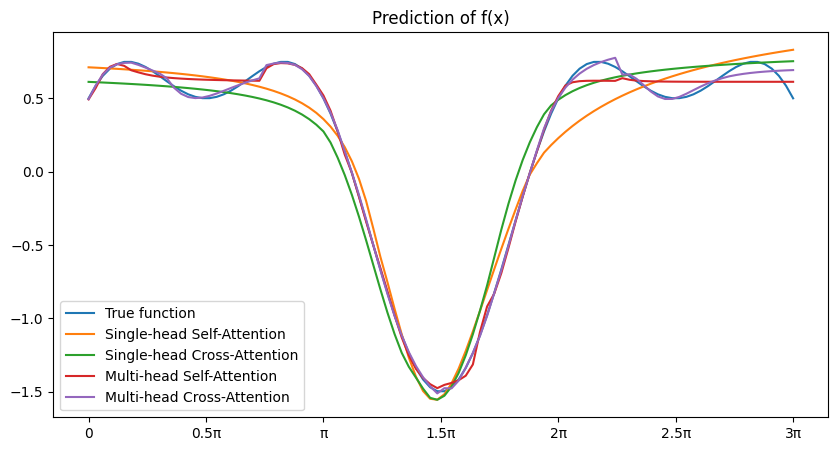

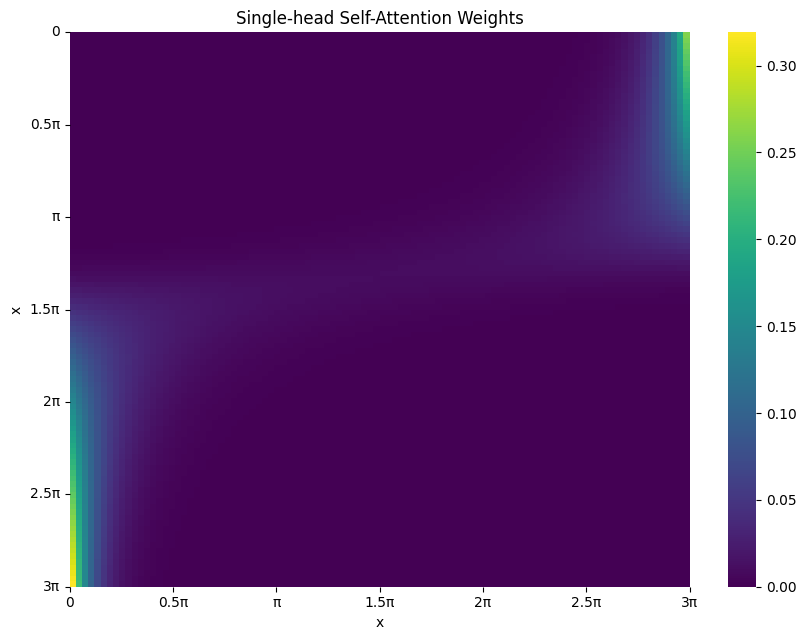

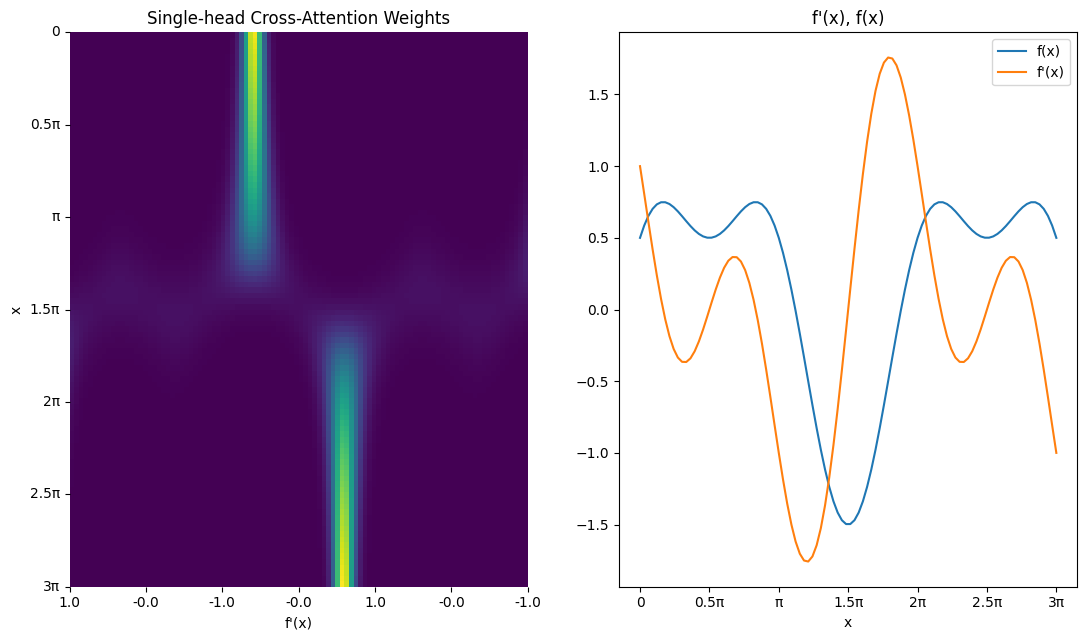

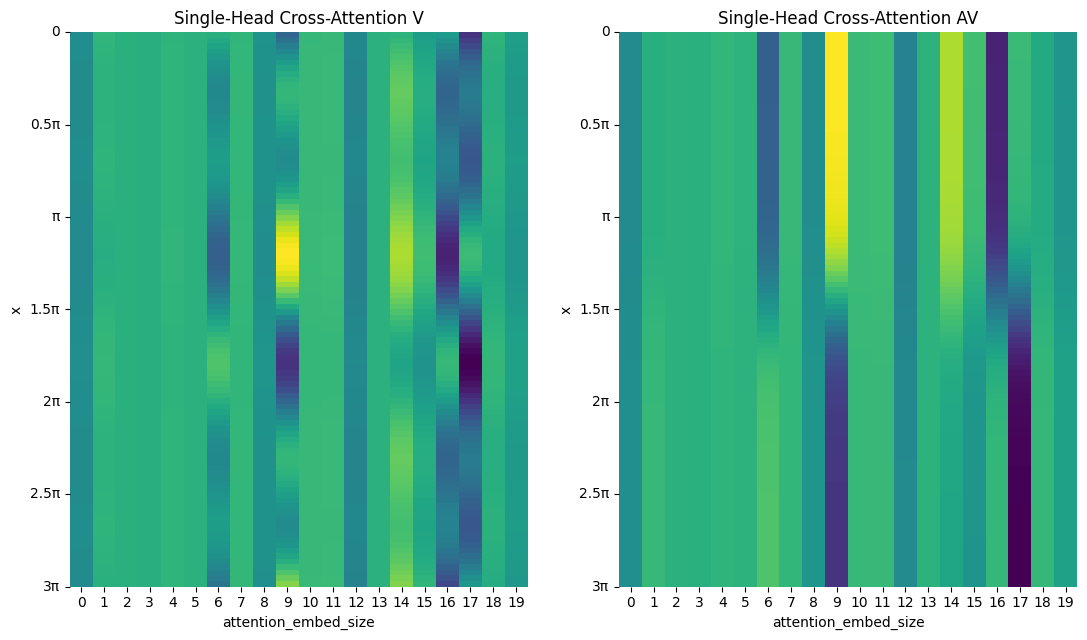

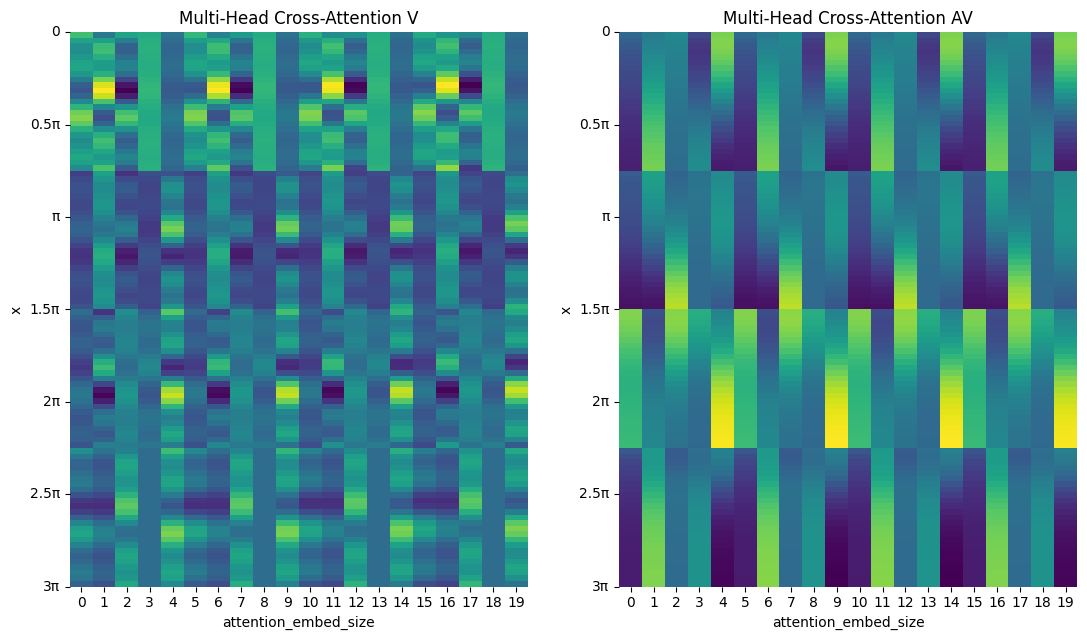

In [43]:
# Testing
s_model.eval()
c_model.eval()
ms_model.eval()
mc_model.eval()
with torch.no_grad():
    s_predictions, s_attention, s_values, s_weighted_sum = s_model(x_tensor.view(1, -1, 1))
    c_predictions, c_attention, c_values, c_weighted_sum = c_model(x_tensor.view(1, -1, 1),yd_tensor.view(1, -1, 1))
    ms_predictions, ms_attention, ms_values, ms_weighted_sum = ms_model(x_tensor.view(1, -1, 1))
    mc_predictions, mc_attention, mc_values, mc_weighted_sum = mc_model(x_tensor.view(1, -1, 1),yd_tensor.view(1, -1, 1))
    s_predictions = s_predictions.view(-1)
    c_predictions = c_predictions.view(-1)
    ms_predictions = ms_predictions.view(-1)
    mc_predictions = mc_predictions.view(-1)

#Plot predicted f(x) vs actual F(x)
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.plot(x, y, label='True function')
ax.plot(x, s_predictions.numpy(), label='Single-head Self-Attention')
ax.plot(x, c_predictions.numpy(), label='Single-head Cross-Attention')
ax.plot(x, ms_predictions.numpy(), label='Multi-head Self-Attention')
ax.plot(x, mc_predictions.numpy(), label='Multi-head Cross-Attention')
ax.set_title("Prediction of f(x)")
ax.set_xticks(np.linspace(0, 3*math.pi, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax.legend()

#Plot single head self-attention weights
fig1, ax1 = plt.subplots(1, 1, figsize=(10, 7.2))
sns.heatmap(s_attention[0].detach().numpy(), cmap='viridis', cbar=True)
ax1.set_title('Single-head Self-Attention Weights')
ax1.set_xlabel('x')
ax1.set_ylabel('x')
ax1.set_xticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax1.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])

#Plot single-head cross-attention weights + f'(x)
fig2, (ax21,ax22) = plt.subplots(1, 2, figsize=(13, 7.2))
sns.heatmap(c_attention[0].detach().numpy(), cmap='viridis', cbar=False, ax=ax21)
ax21.set_title('Single-head Cross-Attention Weights')
ax21.set_xlabel("f'(x)")
ax21.set_ylabel('x')
x_ti = [str(round((np.cos(inp) - np.sin(2 * inp)), 2)) for inp in np.linspace(0, 3*math.pi, 7)]
ax21.set_xticks(np.linspace(0, 100, 7), x_ti)
ax21.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax22.set_title("f'(x), f(x)")
ax22.plot(x, y, label="f(x)")
ax22.plot(x, yd, label="f'(x)")
ax22.set_xlabel("x")
ax22.set_xticks(np.linspace(0, 3*math.pi, 7), ["0", "0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax22.legend()

# Plotting single-head cross attention V and AV
fig3, (ax31,ax32) = plt.subplots(1, 2, figsize=(13, 7.2))
sns.heatmap(c_values[0].detach().numpy(), cmap='viridis', cbar=False, ax=ax31)
ax31.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
sns.heatmap(c_weighted_sum[0].detach().numpy(), cmap='viridis', cbar=False, ax=ax32)
ax32.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax31.set_title('Single-Head Cross-Attention V')
ax32.set_title('Single-Head Cross-Attention AV')
ax31.set_xlabel('attention_embed_size')
ax32.set_xlabel('attention_embed_size')
ax31.set_ylabel('x')
ax32.set_ylabel('x')

# Plotting multi-head cross attention V and AV
fig4, (ax41,ax42) = plt.subplots(1, 2, figsize=(13, 7.2))
sns.heatmap(mc_values.reshape(100,20).detach().numpy(), cmap='viridis', cbar=False, ax=ax41)
ax41.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
sns.heatmap(mc_weighted_sum[0].detach().numpy(), cmap='viridis', cbar=False, ax=ax42)
ax42.set_yticks(np.linspace(0, 100, 7), ["0","0.5π", "π", "1.5π", "2π", "2.5π", "3π"])
ax41.set_title('Multi-Head Cross-Attention V')
ax42.set_title('Multi-Head Cross-Attention AV')
ax41.set_xlabel('attention_embed_size')
ax42.set_xlabel('attention_embed_size')
ax41.set_ylabel('x')
ax42.set_ylabel('x')

## Advanced Preprocessing for LLMs

In our previous lesson we learned that text can be processed by an LLM after undergoing tokenization (splitting the text into unique strings), token encoding (converting string tokens to integers) and finally token embedding (transforming these token integers to vectors which embed semantic meaning). Tokenization/encoding techniques can be thought of as static look up tables, whereas token embedding techniques are dynamic and learnable linear transformations. 

### Advanced Tokenization

In the previous lesson we used a simple spaCy tokenizer. It starts by splitting text on whitespace (spaces, tabs, newlines) and then applies specific rules to handle prefix symbols (`(`, `$`, `"`) and infix symbols (`)`, `km`, `,`).

More advanced tokenization methods break down words into sequences of characters:
* <b>Byte-Pair Encoding (BPE)</b>: starts with a base vocabulary (usually characters) and iteratively combines the most frequent pairs of tokens until the vocabulary reaches a specified size. It is used in LLM models like GPT and RoBERTa. 

* <b>N-gram tokenizer</b>: split text into contiguous sequences of n items (words or characters). For example, bi-grams of the word "hello" are ["he", "el", "ll", "lo"]

### Positional Encoding

Attention mechanisms have no inherent sense of sequence order - an attribute typically managed by RNNs through their sequential processing. In attention based LLMs, positional encoding involves vector addition between a positional embedding and the original word embedding. Positional encoding schemes can be trained or follow a formulaic pattern. 

The sinusoidal positional encoding strategy introduced in [Attention is All You Need](https://arxiv.org/abs/1706.03762) uses position embeddings generated by interleaving a sine and cosine function. The intuition is that the model will pick up on this pattern and use this pattern as an indicator for the position of each word. Unlike learned positional encoding schemes, the sinusoidal pattern enables relative positioning and allows it to support sequence lengths larger than those present in a training set.


<p style="text-align:center;">Positional Encoding</p>
<img src="pos_encoding.png" width="800" align="center">

> A real example of transformer positional encoding for 10 words (rows) with an embedding size of 65 (columns). Notice the interleaved signals

# Transformers

Transformers are neural networks that process sequence data by adopting a fully attention based approach. This allows for parallelization, which meant faster training and optimized performance. Attention also allows for much larger contexts than recurrence, meaning transformers could craft more coherent, relevant, and complex outputs.


## Transformer Architecture 

Encoder decoder structure, like seq2seq, maps input sequence x1, ..., xn to a sequence of representations z1,...,zn. Given z the decoder outputs a sequence y1,...,yn one element at a time in auto-regressive fashion - consuming previously generated symbols as additional input to generate the next.

<p style="text-align:center;">Transformer</p>
<img src="transformer.jpg" width="800" align="center">

Our transformer is attempting to learn weights that will express $\hat{Y} = f(X)$, an estimate of the unknown function $Y = F(X)$. Transformers are concerned with sequential data in the form:
$$X = [x_1, x_2, ..., x_n]$$
$$Y = [y_1, y_2, ..., y_m]$$

For transformer-based LLMs, let $x_i$ and $y_i$ denote token integers.

The following pseudo-code shows how transformer-based LLMs will perform a forward pass through their network to predict $m$ words in an auto-regressive fashion:  
<strong>`f(X)`</strong>
> `X_embedded = InputEmbedding(X) + PositionalEncoding(X)`  
> `X_encoded = Encoder(X_embedded)`  
> `Y = []`  
> `Y_embedded = [OutputEmbedding(<sos>)]`    
> <strong>`WHILE`</strong> `len(Y_embedded) < max_sequence_len` <strong>`AND`</strong> `Y[-1] != <eos>:`  
>> `Y_decoded = Decoder(Y_embedded, X_embedded)`  
>> `y_i_logits = Projector(Y_decoded[-1])`  
>> `y_i_token = argmax(y_i_logits)`  
>> `Y = Concat(Y, y_i_token)`  
>> `Y_embedded = Concat(Y_embedded, OutputEmbedding(y_i_token) + PositionalEncoding(y_i_token))`  

> <strong>`return`</strong> `Y`

(this is an example of 'greedy decoding')  
* $d_{model}$ is the number of dimensions in the embedding space produced by InputEmbedding, OutputEmbedding, and PositionalEncoding  
* $X_{embedded} \in \mathbb{R}^{n \times d_{model}}$  
* The encoder simply produces a new representation of the sequence of $n$ word embeddings where self-attention allows the new embeddings to carry deeper contextual information.  
* Given the $Y_{embedded} \in \mathbb{R}^{i \times d_{model}}$ from the $i$th iteration of the decoding process, the Decoder will always output $Y_{decoded} \in \mathbb{R}^{i \times d_{model}}$.
* The decoder uses $[sos, \hat{y}_1,...,\hat{y}_{i-1}]$ to predict $[\hat{y}_1, ..., \hat{y}_i]$

###### Encoder
The encoder applies multi-head self-attention and a fully connected (feed forward) layer on `X_embedded` to produce `X_encoded` which we will denote as: $$Z_X \in \mathbb{R}^{n \times d_{model}}$$

$Z_X$ encapsulates contextual understanding of the entire input sequence.

The input passes through $N$ of these encoder blocks

###### Decoder
One iteration $i$ of the decoder applies multi-head self-attention on `Y_embedded` to produce: $$Z_Y \in \mathbb{R}^{i \times d_{model}}$$

In the same interation the decoder performs multi-head cross-attention with the following configuration:
$$Q = Z_Y W^Q \text{, so } Q \in \mathbb{R}^{i \times d_{model}}$$
$$K = Z_X W^K \text{, so } K \in \mathbb{R}^{n \times d_{model}}$$ 
$$V = Z_X W^V \text{, so } V \in \mathbb{R}^{n \times d_{model}}$$ 

Since $QK^T, A \in \mathbb{R}^{i \times n}$ the cross-attention output is therefore:
$$Z \in \mathbb{R}^{i \times d_{model}}$$

Cross-attention with encoder outputs $Z_X$ allows the decoder to focus on different parts of the input sequence $X$ based on the current decoding context $Z_Y$.  

The fully connected layer produces the same shape for final input `Y_decoded`$\in \mathbb{R}^{i \times d_{model}}$

Each iteration passes the input+decoded sequence through $N$ of these decoder blocks.

###### Projector

The projector transforms word embeddings into logit vectors which have the dimension of the vocabulary length. These logit vectors repesent a probability distribution over all words in the vocabulary and can be compared with the respective one-hot encoded labels to compute model loss.

<p style="text-align:center;">One-hot encoded words in a very small vocab</p>
<img src="one_hot_encode_vocab.png" width="300" align="center">

## Transformer Forward Propagation

##### Transformer Inference - Worked Example

Suppose we trained a transformer to perform english to french translation. We ignore all concept of tokenization and word embeddings in this example. We're using the transformer to translate "good luck translator" to french "bonne chance traducteur".

1. Encoder produces encoded english sentence $\text{encoded_input}$ = $[\text{good}, \text{luck}, \text{translator}]$  

2. Decoder predicts 1st french word $\hat{\text{bonne}}$ from input $\text{<sos>}$ and $\text{encoded_input}$. 

The decoder self attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">sos</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">sa11</td>
    </tr>
</table>

The decoder cross attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">good</th>
        <th align="center">luck</th>
        <th align="center">translator</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">ca11</td>
        <td align="center">ca12</td>
        <td align="center">ca13</td>
    </tr>
</table>

3. Decoder predicts 1st, 2nd french word $\hat{\text{bonne'}}, \hat{\text{chance}}$ from input $\text{<sos>}, \hat{\text{bonne}}$ and $\text{encoded_input}$.

The decoder self attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">sos</th>
        <th align="center">bonne</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">sa11</td>
        <td align="center">sa12</td>
    </tr>
    <tr>
        <th align="center">bonne</th>
        <td align="center">sa21</td>
        <td align="center">sa22</td>
    </tr>
</table>

The decoder cross attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">good</th>
        <th align="center">luck</th>
        <th align="center">translator</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">ca11</td>
        <td align="center">ca12</td>
        <td align="center">ca13</td>
    </tr>
    <tr>
        <th align="center">bonne</th>
        <td align="center">ca21</td>
        <td align="center">ca22</td>
        <td align="center">ca23</td>
    </tr>
</table>

4. Decoder predicts 1st, 2nd, 3rd french word $\hat{\text{bonne''}}, \hat{\text{chance'}}, \hat{\text{traducteur}}$ from input $\text{<sos>}, \hat{\text{bonne}}, \hat{\text{chance}}$ and $\text{encoded_input}$.

The decoder self attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">sos</th>
        <th align="center">bonne</th>
        <th align="center">chance</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">sa11</td>
        <td align="center">sa12</td>
        <td align="center">sa13</td>
    </tr>
    <tr>
        <th align="center">bonne</th>
        <td align="center">sa21</td>
        <td align="center">sa22</td>
        <td align="center">sa23</td>
    </tr>
    <tr>
        <th align="center">chance</th>
        <td align="center">sa31</td>
        <td align="center">sa32</td>
        <td align="center">sa33</td>
    </tr>
</table>

The decoder cross attention weights look like:

<table border="1">
    <tr>
        <th></th>
        <th align="center">good</th>
        <th align="center">luck</th>
        <th align="center">translator</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">ca11</td>
        <td align="center">ca12</td>
        <td align="center">ca13</td>
    </tr>
    <tr>
        <th align="center">bonne</th>
        <td align="center">ca21</td>
        <td align="center">ca22</td>
        <td align="center">ca23</td>
    </tr>
    <tr>
        <th align="center">chance</th>
        <td align="center">ca31</td>
        <td align="center">ca32</td>
        <td align="center">ca33</td>
    </tr>
</table>

Official output: $\hat{\text{bonne}}, \hat{\text{chance}}, \hat{\text{traducteur}}$

## Transformer Training 
To train the Transformer we could follow the same process as we do when we perform inference , each step $i$ calculating the loss between $[\hat{y}_1,...,\hat{y}_i]$ and $[y_1, ..., y_i]$. But this is time consuming and we don't necessrily need to use previously decoded words $[sos, \hat{y}_1,...,\hat{y}_{i-1}]$ to predict $\hat{y}_i$, since the actual labels $[y_1, ..., y_{i-1}]$ are already available to us. 


We can simulate the auto-regressive behavior in one single forward pass if we input [sos,$y_1, ..., y_{m-1}$] into the decoder and apply a masking technique to prevent the model from 'cheating' by blocking leftward information flow in the pre-softmax attention matrix. 
    
    
<table border="1">
    <tr>
        <th></th>
        <th align="center">sos</th>
        <th align="center">bonne</th>
        <th align="center">chance</th>
    </tr>
    <tr>
        <th align="center">sos</th>
        <td align="center">sa11</td>
        <td align="center">-∞</td>
        <td align="center">-∞</td>
    </tr>
    <tr>
        <th align="center">bonne</th>
        <td align="center">sa21</td>
        <td align="center">sa22</td>
        <td align="center">-∞<td>
    </tr>
    <tr>
        <th align="center">chance</th>
        <td align="center">sa31</td>
        <td align="center">sa32</td>
        <td align="center">sa33</td>
    </tr>
</table>
    
The masking transforms the self attention matrix into a lower triangular matrix where the upper terms past the diagonal are set to $-\infty$, preventing future words in the sequence from attending to previous words. 

## Transformer Loss

Categorical Cross-entropy Loss the most popular loss function for LLMs trained to generate text. 

Recall that the Projector passes the decoder output `Y_decoded`$\in \mathbb{R}^{m \times d_{model}}$ through a linear layer and a softmax activation function. The linear layer generates logits with shape $m \times \text{vocabulary size}$, when passed through the softmax function the final output of the transformer is a sequence of probability vectors $\hat{P}: m \times\text{vocabulary size}$. This probability vector represents a distribution over all words in the vocabulary, indicating the likelihood of a specific word in the vocabulary.

We train the Transformer to minimize the following loss function:
$$\text{Categorical Cross-Entropy Loss}$$
$$L = -\frac{1}{m}\sum_{i}^{m} p(y_i)log(\hat{p}_i)$$

Where $p(y_i)$ is the one-hot encoding of the token $y_i$

A lower cross-entropy loss function indicates that the model is better at matching the vocabulary-wide distribution of the predicted word with that of the true word.

###### Further Reading:

The illustrated transformer:
https://jalammar.github.io/illustrated-transformer/

LLM Visualization:
https://bbycroft.net/llm

The annotated transformer (transformer implemented from scratch using PyTorch):
https://nlp.seas.harvard.edu/annotated-transformer/

### Hugging Face

Hugging Face's Transformers library provides a wide range of pretrained models. It is built on top of PyTorch and TensorFlow, allowing users to choose their preferred backend.

In the following example we perform fine tuning on a pre-trained version of GPT2 using an article about the history of Australia in the Olympics: https://www.olympics.com.au/100-years-of-the-aoc/. GPT2 is not very good at producing factual information, after fine tuning we can see that it atleast recognises the names of Australian olympians. 

**Fine tuning** extends the knowledge of an LLM by resuming the training process of a pre-trained model using unseen data. Typically fine tuning is performed with fewer training epochs and lower learning rates.

In [2]:
from transformers import GPT2LMHeadModel, GPT2Tokenizer
import torch

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

tokenizer = GPT2Tokenizer.from_pretrained("gpt2")
model = GPT2LMHeadModel.from_pretrained("gpt2")

def generate_text(prompt, model, tokenizer, num_beams=5, no_repeat_ngram_size=2, top_p=0.1, temperature=0.3):
    inputs = tokenizer.encode(prompt, return_tensors="pt")
    inputs_ = inputs.to('cpu')
    model_ = model.to('cpu')
    outputs = model_.generate(inputs_, max_length=100, num_beams=num_beams, no_repeat_ngram_size=no_repeat_ngram_size, top_p=top_p, early_stopping=True, temperature=temperature)
    return tokenizer.decode(outputs[0], skip_special_tokens=True)

In [ ]:
prompt = "A transformer is a "
response = generate_text(prompt, model, tokenizer)
print("Response:", response)

# Examples of topical queries before fine-tuning
prompt = "Jessica Fox won gold in "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Who is Cathy Freeman?"
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "In Tokyo 2020, Emma McKeon "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Patrick Mills is a"
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Australia's Olympic history is "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)

In [3]:
from transformers import TextDataset, DataCollatorForLanguageModeling, Trainer, TrainingArguments

# Load the dataset and prepare for training
dataset = TextDataset(
    tokenizer=tokenizer,
    file_path="Australian_Olympics_21ct.txt",
    block_size=100
)

data_collator = DataCollatorForLanguageModeling(
    tokenizer=tokenizer, mlm=False
)

training_args = TrainingArguments(
    output_dir="./gpt2-finetuned",
    overwrite_output_dir=True,
    num_train_epochs=5,
    per_device_train_batch_size=2,
    save_steps=100,
    save_total_limit=2,
    learning_rate = 0.0001,
)

model = model.to(device)

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=data_collator,
    train_dataset=dataset
)



C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\data\datasets\language_modeling.py:53: FutureWarning: This dataset will be removed from the library soon, preprocessing should be handled with the 🤗 Datasets library. You can have a look at this example script for pointers: https://github.com/huggingface/transformers/blob/main/examples/pytorch/language-modeling/run_mlm.py
  warnings.warn(
C:\Users\z5162987\anaconda3\Lib\site-packages\accelerate\accelerator.py:446: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None)
  warnings.warn(


In [ ]:
# Fine-tuning the model
trainer.train()

In [64]:
# Test the fine-tuned model on topical prompts

prompt = "Jessica Fox won gold in "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Who is Cathy Freeman?"
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "In Tokyo 2020, Emma McKeon "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Patrick Mills is a"
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)
prompt = "Australia's Olympic history is "
response = generate_text(prompt, model, tokenizer, num_beams=10, no_repeat_ngram_size=4, top_p=0.4, temperature=0.8)
print("\n\nResponse:", response)

C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\generation\configuration_utils.py:362: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.8` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\generation\configuration_utils.py:367: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.4` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's



Response: Jessica Fox won gold in ’s butterfly and ’s snowboarder, and the Australian flag was carried in front of a crowd of more than 100,000.

The AOC’s annual general counsel, John Coates, told the AOC annual general meeting that the AOC was committed to serving the best interests of the Australian people.

He said the Foundation’s mission was guided by the values enshrined in the Constitution,


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




Response: Who is Cathy Freeman?

Cathy Freeman was born in Brisbane in 1952 and became a member of the IOC in 1952. Her first Olympic Games were held in 1952 when she won the women’s 400m freestyle and the men’s 4x400m freestyle relay team of which she was a member.

In 1952, Cathy Freeman became Australia’s first female Olympian to win two Olympic gold medals at the same Olympics.

She was the first


The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




Response: In Tokyo 2020, Emma McKeon ’ led the women’s 200m freestyle team and the men’s 4x200m freestyle relay team.

The Tokyo 2020 Winter Olympic Games were a success and the AOC’s ambition to host a global Games was vindicated when the IOC’s 2020 Agenda was presented to the AOC with the objective of hosting a world’s largest and best-in-class Olympic Games.




The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.




Response: Patrick Mills is a member of the IOC’s Executive Board of Trustees comprising Chef de Mission, Chef de Mission and Chef de Mission Chef de Mission’s Chef de Mission Team Chef de Mission.

The AOC is committed to serving the best interests of the Australian people, and we look forward to working with you to achieve these objectives.

To achieve these objectives, the AOC and the AOC’s AOC Mission Coordination Committee (OCJC) are


Response: Australia's Olympic history is iced off with gold in the 200m freestyle and silver in the 400m freestyle.

The women’s 4x200m freestyle relay team of Kylie Bainbridge (Australia), Kiaan Henke (Sweden) and Libby Trickett (Switzerland) captured gold in the 4x400m freestyle, while the men’s 400m relay team of Susie O’Smith (Australia) captured bronze in


In [1]:
from datasets import Dataset
import numpy as np

# Example data
data = {
    "title": ["Vader Confession", "Luke's Shock"],  # Example titles
    "text": ["Darth Vader: I am your father.", "Luke: No, that's not true! That's impossible!"],
    "embeddings": np.random.rand(2, 768).astype('float32').tolist()  # Dummy embeddings for demonstration
}

# Create a dataset from the dictionary
dataset = Dataset.from_dict(data)

# Save the dataset to disk
dataset.save_to_disk('./movie_dialogue_dataset')

import faiss

# Assuming you have the embeddings as a NumPy array
embeddings = np.array(data["embeddings"])

# Initialize and build a FAISS index
index = faiss.IndexFlatL2(768)  # L2 distance for similarity
index.add(embeddings)  # Adding embeddings to the index

# Save the index to disk
faiss.write_index(index, './movie_dialogue_index.faiss')

from transformers import RagConfig, RagTokenizer, RagRetriever, RagTokenForGeneration

# Load the tokenizer and model
tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-nq")
model = RagTokenForGeneration.from_pretrained("facebook/rag-token-nq")

# Configure the retriever
config = RagConfig.from_pretrained("facebook/rag-token-nq")
config.index_name = 'custom'
config.retrieval_vector_size = 768
config.dataset = "path_to_dataset"  # This should be the path where your dataset is stored
config.index_path = "path_to_faiss_index"  # Path to your FAISS index

# Initialize the retriever
retriever = RagRetriever(config, question_encoder_tokenizer=tokenizer, generator_tokenizer=tokenizer)

# Attach the retriever to the model
model.set_retriever(retriever)

inputs = tokenizer("What does Darth Vader say to Luke about his father?", return_tensors="pt")
generated_ids = model.generate(input_ids=inputs["input_ids"], num_beams=5)
response = tokenizer.decode(generated_ids[0], skip_special_tokens=True)

print("Response:", response)


Saving the dataset (0/1 shards):   0%|          | 0/2 [00:00<?, ? examples/s]

C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\models\bart\configuration_bart.py:179: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Rag

ValueError: Please provide `dataset_path` and `index_path` after calling `dataset.save_to_disk(dataset_path)` and `dataset.get_index('embeddings').save(index_path)`.

In [1]:
from transformers import RagTokenizer, RagRetriever, RagTokenForGeneration

rag_tokenizer = RagTokenizer.from_pretrained("facebook/rag-token-nq")
rag_model = RagTokenForGeneration.from_pretrained("facebook/rag-token-nq")
retriever = RagRetriever.from_pretrained("facebook/rag-token-nq", index_name="custom", passages_path="Australian_Olympics_21ct.txt")

# Generate response using RAG
prompt = "Cathy Freeman is "
inputs = rag_tokenizer(prompt, return_tensors="pt")
with rag_model.retrieve(inputs["input_ids"]) as retrieved:
    outputs = rag_model.generate(input_ids=inputs["input_ids"], context_input_ids=retrieved.context_input_ids, context_attention_mask=retrieved.context_attention_mask)
    rag_response = rag_tokenizer.decode(outputs[0], skip_special_tokens=True)

print("RAG Response:", rag_response)

C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\z5162987\anaconda3\Lib\site-packages\transformers\models\bart\configuration_bart.py:179: UserWarning: Please make sure the config includes `forced_bos_token_id=0` in future versions. The config can simply be saved and uploaded again to be fixed.
  warnings.warn(
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'Rag

ValueError: Please provide `dataset_path` and `index_path` after calling `dataset.save_to_disk(dataset_path)` and `dataset.get_index('embeddings').save(index_path)`.